# Notebook 2: Using Regressions to Predict Age-of-Death of Skeletal Remains

## 1.1 A brief overview of KNN Regression

In archaeology, regression is a predictive framework in which we use **measured attributes from known examples** to predict **outcomes for new finds**. 

- **Dependent Variable:** The single numerical value we want our model to estimate for each new observation, also called an outcome variable. Typically denoted using $Y_i$. 

- **Independent Variables**: The measurements or attributes we use to explain or predict our dependent variable, usually denoted using $X_{ij}$. 

Our dependent variable might be something like an individual’s age at death, estimated from osteometric measurements, or the approximate date of an artifact, inferred from its dimensional and compositional features. For instance, we could use a suite of cranial measurements collected from skeletal remains to predict a individual's age, or leverage sherd thickness, fabric inclusions, and decoration motifs to estimate an artifact’s production century.

Among the many regression techniques available, the K-nearest neighbors (KNN) algorithm is particularly intuitive and flexible. To apply KNN, we first assemble a reference dataset of specimens whose ages or dates are reliably known—perhaps through radiocarbon dating or historical documentation. Each new specimen is then compared to its K most similar neighbors (e.g., measurements of bone lengths, cortical thickness, strontium ratios, decoration counts), and its predicted age or date is calculated to be the average value of those neighbors.

## 1.2 Exploring the dataset

In [44]:
import altair as alt
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from pytimetk import glimpse
import matplotlib.pyplot as plt

    
# Output dataframes instead of arrays
set_config(transform_output="pandas")

np.random.seed(10)

goldman_skeletons = pd.read_csv('Goldman.csv', encoding="utf-8")

In [ ]:

print(goldman_skeletons.columns.values)

glimpse(goldman_skeletons)

['Inst' 'ID' 'Sex' 'Age' 'NOTE' 'Location' 'Element:' 'LHUM' 'RHUM' 'LRAD'
 'RRAD' 'LFEM' 'RFEM' 'LTIB' 'RTIB' 'OSCX' 'Metrics:' 'LHML' 'LHEB' 'LHHD'
 'LHMLD' 'LHAPD' 'RHML' 'RHEB' 'RHHD' 'RHMLD' 'RHAPD' 'LRML' 'LRMLD'
 'LRAPD' 'RRML' 'RRMLD' 'RRAPD' 'LFML' 'LFBL' 'LFEB' 'LFAB' 'LFHD' 'LFMLD'
 'LFAPD' 'RFML' 'RFBL' 'RFEB' 'RFAB' 'RFHD' 'RFMLD' 'RFAPD' 'LTML' 'LTPB'
 'LTMLD' 'LTAPD' 'RTML' 'RTPB' 'RTMLD' 'RTAPD' 'BIB' 'LIBL' 'RIBL' 'LAcH'
 'RAcH' 'Derived:' 'Brachial' 'Crural' 'IL UL/LL' 'IL LL/UL' 'CBR FHD'
 'McH FHD' 'GRINE FHD' 'AVG FHD']
<class 'pandas.core.frame.DataFrame'>: 1538 rows of 69 columns
Inst:       object            ['AMNH', 'AMNH', 'AMNH', 'AMNH', 'AMNH', ' ...
ID:         object            ['99.1/69', '99.1/70', '99.1/75A', '99.1/8 ...
Sex:        object            ['0', '1', '0', '0', '1', '1', '0', '0', ' ...
Age:        object            ['40-50', '50+', '30-50', '25-30', '50+',  ...
NOTE:       object            ['Tigara - Point Hope, AK', 'Norton - Poin ...
Locat

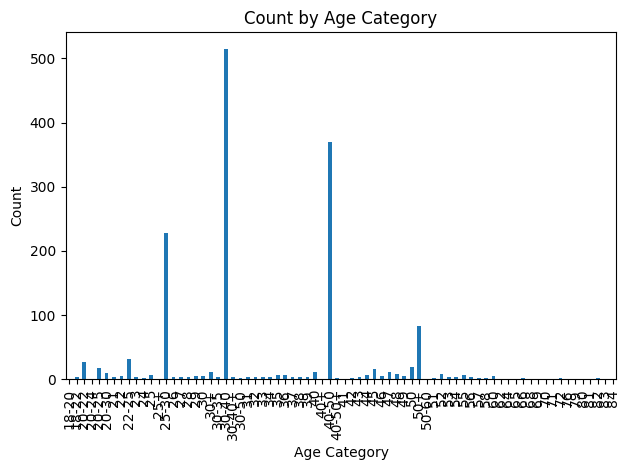

In [46]:
plt.figure()
goldman_skeletons['Age'].value_counts().sort_index().plot.bar()
plt.title('Count by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

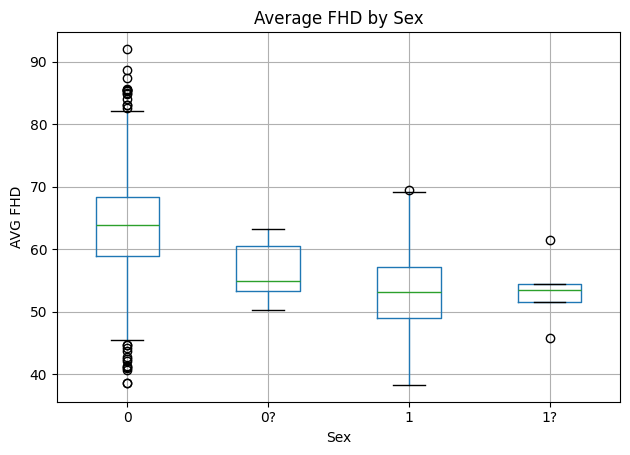

In [54]:
plt.figure()
goldman_skeletons.boxplot(column='AVG FHD', by='Sex')
plt.title('Average FHD by Sex')
plt.suptitle('')
plt.xlabel('Sex')
plt.ylabel('AVG FHD')
plt.tight_layout()
plt.show()

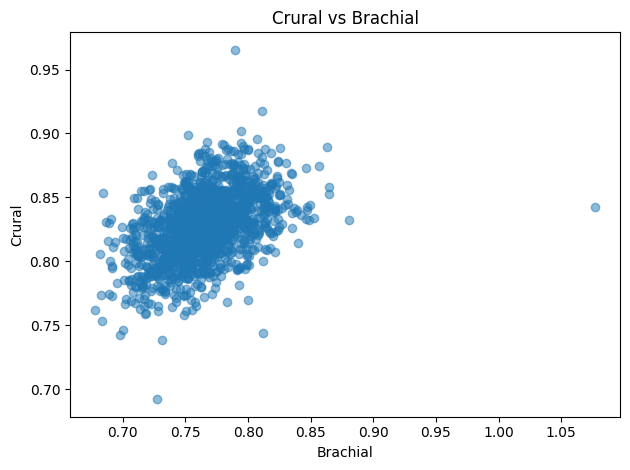

In [52]:
plt.figure()
plt.scatter(
    goldman_skeletons['Brachial'],
    goldman_skeletons['Crural'],
    alpha=0.5
)
plt.title('Crural vs Brachial')
plt.xlabel('Brachial')
plt.ylabel('Crural')
plt.tight_layout()
plt.show()
